# Pymaceuticals Inc.
---

For this challenge, I joined the pharmaceutical company, Pymaceuticals, Inc., in order to generate tables, figures, and summarize the results from a clinical study performed on mice with squamous cell carcinoma (SCC). The objective of the study was to compare the performance of the drug regimen Capomulin against other treatments for this form of skin cancer. The study was conducted on 249 mice over 45 days, where the development of the SCC tumors were observed.

I was provided with the study's results on different CSV files. Using different statistical Python libraries and modules, I successfully analyzed and visualized the results of the study below. Here are the observations I made:

## Observations and Analysis

### Trends from the Overall Study

Before looking at the overall summary of the study, it is important to notate that the sex of the mice observed was generally even, with a slight male skew (51%). In addition, a female mouse on Propriva was identified and removed from the study to ensure a clean dataset.

In observing the data, we can see that Capomulin and Ramicane were the drug regimens that were most observed in terms of the number of mice. Furthermore, they each had the lowest average tumor volume (about 40.68 and 40.22 mm3 for Capomulin and Ramicane, respectively) of all the drug regimens in the study. The same can be said about the median, variance, and standard deviation of their tumor volumes. Each statistical result proved to be significantly lower than the rest of the drug regimen, showcasing the consistent effectiveness of these drug regimens in particular.

### Comparing Capomulin to Ramicane and Other Regimens

Further analyzation of Capomulin, Ramicane, Infubinol, and Ceftamin drug regimens yield interesting results. When comparing the last timepoint for each mouse on these regimens, we can see that, as was the case above, the mice on the Capomulin and Ramicane regimens had lower tumor volumes than the mice on Infubinol and Ceftamin. In the case of Infubinol, there was a notable outlier below the lower bound of the regimen's boxplot; none of the other drug regimens had any statistical outliers. Despite this outlier, the lower bounds for Infubinol and Ceftamin were around the same volume size of the upper bounds for Capomulin and Ramicane, further demonstrating the effectiveness of the latter two in particular.

Between Capomulin and Ramicane, their boxplots were very similar. However, Ramicane's median and overall range of its data was less than Capomulin. This serves to emphasize that Ramicane is a better performing drug regimen than Capomulin. This is further helped by the statistical summary results, where the average, median, variance, standard deviation, and standard error for the mice on Ramicane were all slightly less than the ones for the mice on Capomulin. While both appear to be very effective compared to other drug regimens, it is Ramicane that slightly edges out Capomulin as the one that yeilds better results.

### Trends in the Capomulin Drug Regimen

Analyzing the drug regimen Capomulin by itself generates notable statistical results. When seeing the trend in tumor volume for a mouse over the course of the study, we notice that the size fluctuates, but generally decreases over time. This serves to further prove its effectiveness in treating the tumor. Moving forward, when comparing the weight of the mice on Capomulin and their average tumor size, there is a noticable positive correlation. With a correlation coefficient of about 0.84, it can be said that the weight of the mice and the size of their tumor have some relationship to each other. It should be noted that this does not necessarily mean that the size of the tumor is caused by their weight. Despite this, there is a clear association between the two.

## Conclusion

Overall, the study was able to successfully show that Capomulin was effective in treating SCC tumors. Despite Ramicane performing slightly better, it should be noted that Capomulin was still able to outperform all the other drug regimens. Further studies can be done to show the effects of the regimens over a longer period of time. In addition, analyzing the results by the sex or the age of the mice can provide even more context and give Pymaceuticals, Inc. more data on the performance of Capomulin.


---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


dupe_series = mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])
series_index = 0
for i in dupe_series:
    if i == True:
        break
    series_index += 1

dupe_mouse = mouse_study_df.iloc[series_index, 0:1]
dupe_mouse.values

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = mouse_study_df[mouse_study_df["Mouse ID"] == dupe_mouse["Mouse ID"]]
dupe_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"] == dupe_mouse["Mouse ID"]].index)
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
tumor_mean = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stdev,
    "Tumor Volume Std. Err.": tumor_sem
})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = mouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

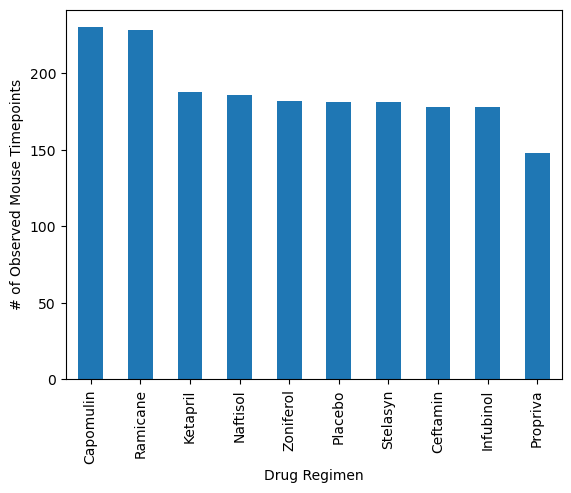

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
group_bar = mouse_df.groupby(["Drug Regimen"])['Timepoint'].count().sort_values(ascending=False)
bar_chart = group_bar.plot(kind='bar', ylabel="# of Observed Mouse Timepoints")


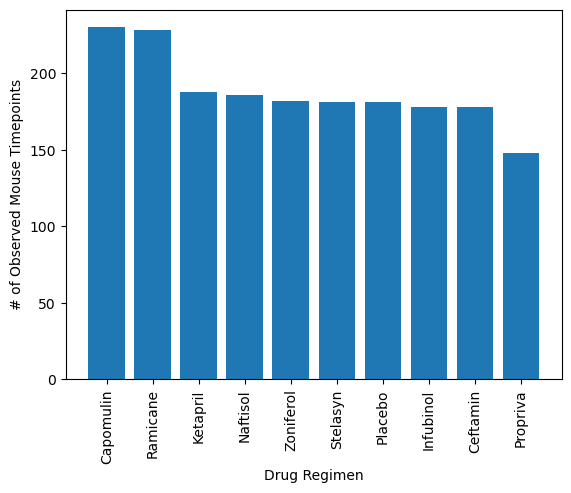

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data = mouse_df["Drug Regimen"].value_counts().sort_values(ascending=False)

plt.bar(bar_data.index, bar_data)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')

plt.show()

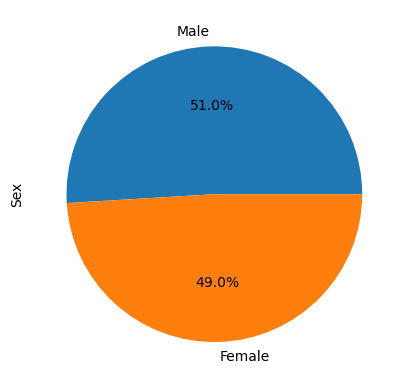

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group_pie = mouse_df.groupby("Sex")["Sex"].count().sort_values(ascending=False)
pie_chart = group_pie.plot(kind='pie', autopct='%1.1f%%')


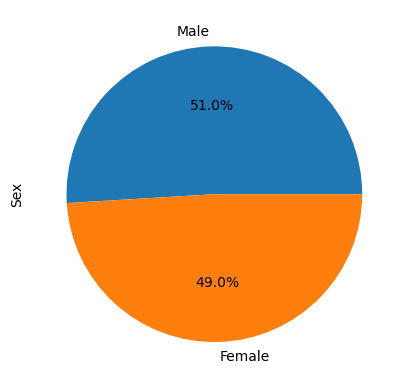

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = mouse_df["Sex"].value_counts()
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_data.index)
plt.ylabel(pie_data.index.name)

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_mouse = mouse_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = pd.merge(grouped_mouse, mouse_df, on=["Mouse ID", "Timepoint"], how="left")
merged_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    mouse_tumor = merged_mouse[merged_mouse["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # add subset 

    tumor_vol.append(mouse_tumor)
    
    # Determine outliers using upper and lower bounds

    quartiles = mouse_tumor.quantile([.25, .5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = mouse_tumor.loc[(mouse_tumor.values < lower_bound) | (mouse_tumor.values > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


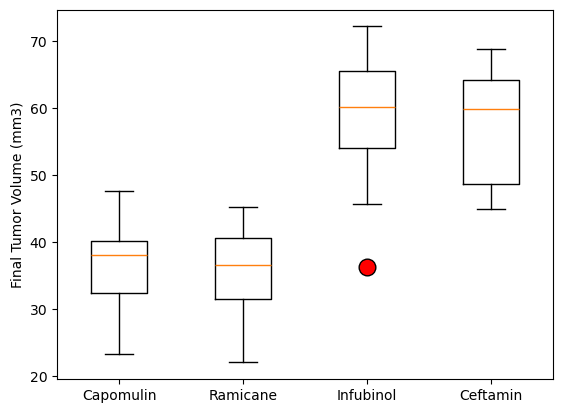

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_axis = []
for x in range(1,(len(treatments) + 1)):
    x_axis.append(x)

fig, ax = plt.subplots()
ax.boxplot(tumor_vol, flierprops=dict(markerfacecolor='r', markersize=12))
ax.set_xticks(x_axis, treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

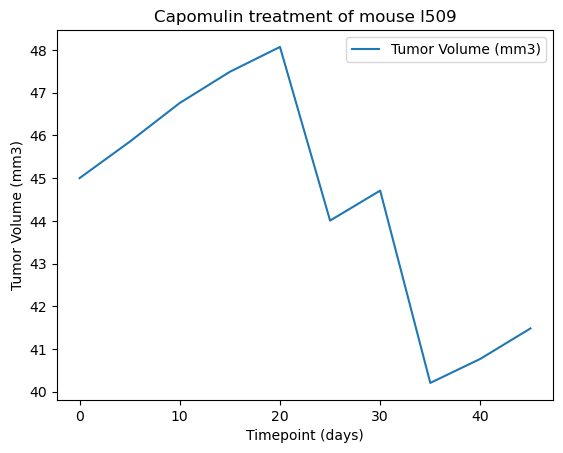

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treatment_mouse = mouse_df[mouse_df["Mouse ID"] == "l509"]
mouse_line = treatment_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
mouse_line.plot(kind='line')
plt.title(f"{treatment_mouse['Drug Regimen'].values[0]} treatment of mouse {treatment_mouse['Mouse ID'].values[0]}")
plt.ylabel(mouse_line.columns[0])
plt.xlabel("Timepoint (days)")

plt.show()

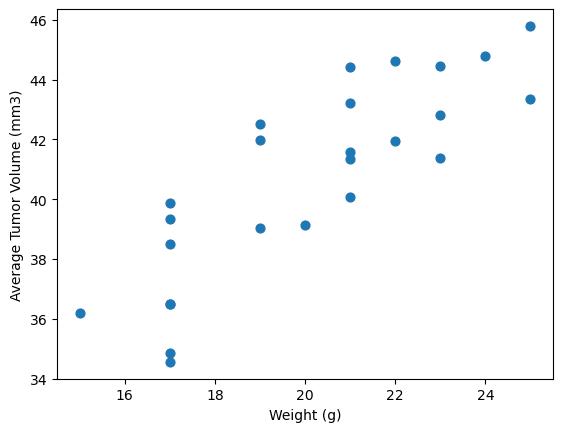

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse = mouse_df[mouse_df["Drug Regimen"] == "Capomulin"][["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grouped_capomulin = capomulin_mouse.groupby(["Mouse ID"]).mean(["Weight (g)", "Tumor Volume (mm3)"])

grouped_capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40)
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


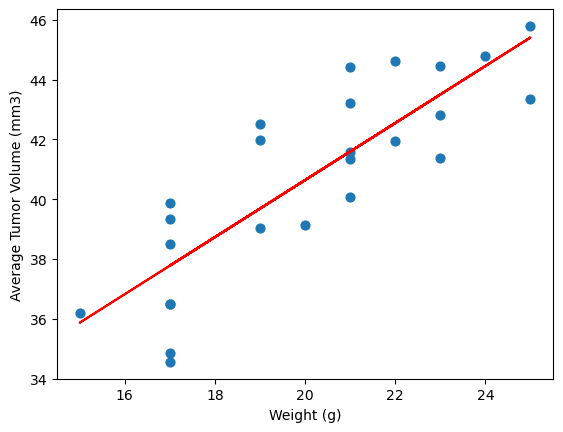

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
grouped_capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40, ylabel="Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(grouped_capomulin["Weight (g)"],grouped_capomulin["Tumor Volume (mm3)"])

regress_values = grouped_capomulin["Weight (g)"].values * slope + intercept
plt.plot(grouped_capomulin["Weight (g)"], regress_values, color='r')

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")